In [1]:
# Source: https://www.kaggle.com/kanncaa1/feature-selection-and-data-visualization
# https://towardsdatascience.com/feature-selection-techniques-1bfab5fe0784

import pandas as pd

mushrooms = pd.read_csv("./datasets/mushrooms.csv")
print ("Dataset shape: ", mushrooms.shape, "\n")

print("Top 5 rows in dataset:")
print(mushrooms.head())

Dataset shape:  (8124, 23) 

Top 5 rows in dataset:
  class cap-shape cap-surface cap-color bruises odor gill-attachment  \
0     p         x           s         n       t    p               f   
1     e         x           s         y       t    a               f   
2     e         b           s         w       t    l               f   
3     p         x           y         w       t    p               f   
4     e         x           s         g       f    n               f   

  gill-spacing gill-size gill-color  ... stalk-surface-below-ring  \
0            c         n          k  ...                        s   
1            c         b          k  ...                        s   
2            c         b          n  ...                        s   
3            c         n          n  ...                        s   
4            w         b          k  ...                        s   

  stalk-color-above-ring stalk-color-below-ring veil-type veil-color  \
0                      w    

In [2]:
# Divide the data into attributes( = X) & output( = Y)
# Then to train & test sets

import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Plot the distribution of two classes viz Po(poisonous) & Ed(edible)
Y = mushrooms['class']
ax = sns.countplot(Y, label="Count")
Po, Ed = Y.value_counts()
print('Number of edible mushrooms: ', Po)
print('Number of poisonous mushrooms : ', Ed)

X = mushrooms.drop(['class'], axis = 1)
X = pd.get_dummies(X, prefix_sep='_')
print ("X shape: ", X.shape)

# One hot encode categorical values
Y = LabelEncoder().fit_transform(Y)

X2 = StandardScaler().fit_transform(X)

# Split into train-test sets
X_Train, X_Test, Y_Train, Y_Test = train_test_split(X2, Y, test_size = 0.30, random_state = 101)

print ("Train set size: ", X_Train.shape)
print ("Test set size: ", X_Test.shape)


Number of edible mushrooms:  4208
Number of poisonous mushrooms :  3916
X shape:  (8124, 117)
Train set size:  (5686, 117)
Test set size:  (2438, 117)


Features with correlation >= 0.5: 
 bruises_f                     0.501530
bruises_t                     0.501530
odor_f                        0.623842
odor_n                        0.785557
gill-size_b                   0.540024
gill-size_n                   0.540024
gill-color_b                  0.538808
stalk-surface-above-ring_k    0.587658
stalk-surface-below-ring_k    0.573524
ring-type_p                   0.540469
Y                             1.000000
Name: Y, dtype: float64 



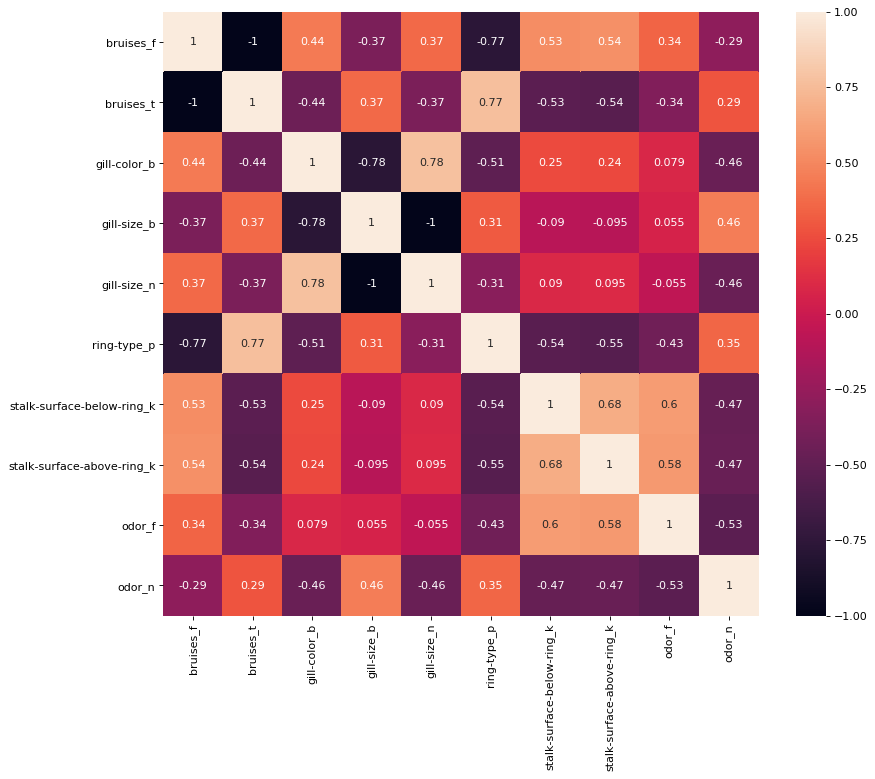

In [3]:
# ~~~~~~~~ Filter Method Contd.~~~~~~~~~
# Correlation Matrix Analysis

Numeric_df = pd.DataFrame(X)
Numeric_df['Y'] = Y
corr = Numeric_df.corr()
corr_y = abs(corr["Y"])

# Considering the features that are at least 0.5 correlated with the output variable
highest_corr = corr_y[corr_y > 0.5]
highest_corr.sort_values(ascending = True)
print ("Features with correlation >= 0.5: \n", highest_corr, "\n")

# Plotting a Correlation Matrix
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

figure(num=None, figsize=(12, 10), dpi=80, facecolor='w', edgecolor='k')

corr2 = Numeric_df[['bruises_f' , 'bruises_t' , 'gill-color_b' , 'gill-size_b' , 
                    'gill-size_n' , 'ring-type_p' , 'stalk-surface-below-ring_k' , 
                    'stalk-surface-above-ring_k' , 'odor_f', 'odor_n']].corr()

sns.heatmap(corr2, annot=True, fmt=".2g")

In [4]:
# Select the features that are most correlated with Y
# train/test an SVM model to evaluate the results of this approach
X_Reduced2 = X[['bruises_f', 'bruises_t', 'gill-color_b', 
                'gill-size_b', 'gill-size_n', 'ring-type_p', 
                'stalk-surface-below-ring_k', 'stalk-surface-above-ring_k', 
                'odor_f', 'odor_n']]
X_Reduced2 = StandardScaler().fit_transform(X_Reduced2)
X_Train3, X_Test3, Y_Train3, Y_Test3 = train_test_split(X_Reduced2, Y, 
                                                        test_size = 0.30, 
                                                        random_state = 101)
                                                        
import time
from sklearn import svm
from sklearn.metrics import classification_report,confusion_matrix
start = time.process_time()
trainedsvm = svm.LinearSVC().fit(X_Train3, Y_Train3)
print("Processing time(s): ", time.process_time() - start)

predictionsvm = trainedsvm.predict(X_Test3)
print(confusion_matrix(Y_Test3,predictionsvm))
print(classification_report(Y_Test3,predictionsvm))

Processing time(s):  0.03491700000000009
[[1248   26]
 [  46 1118]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.96      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



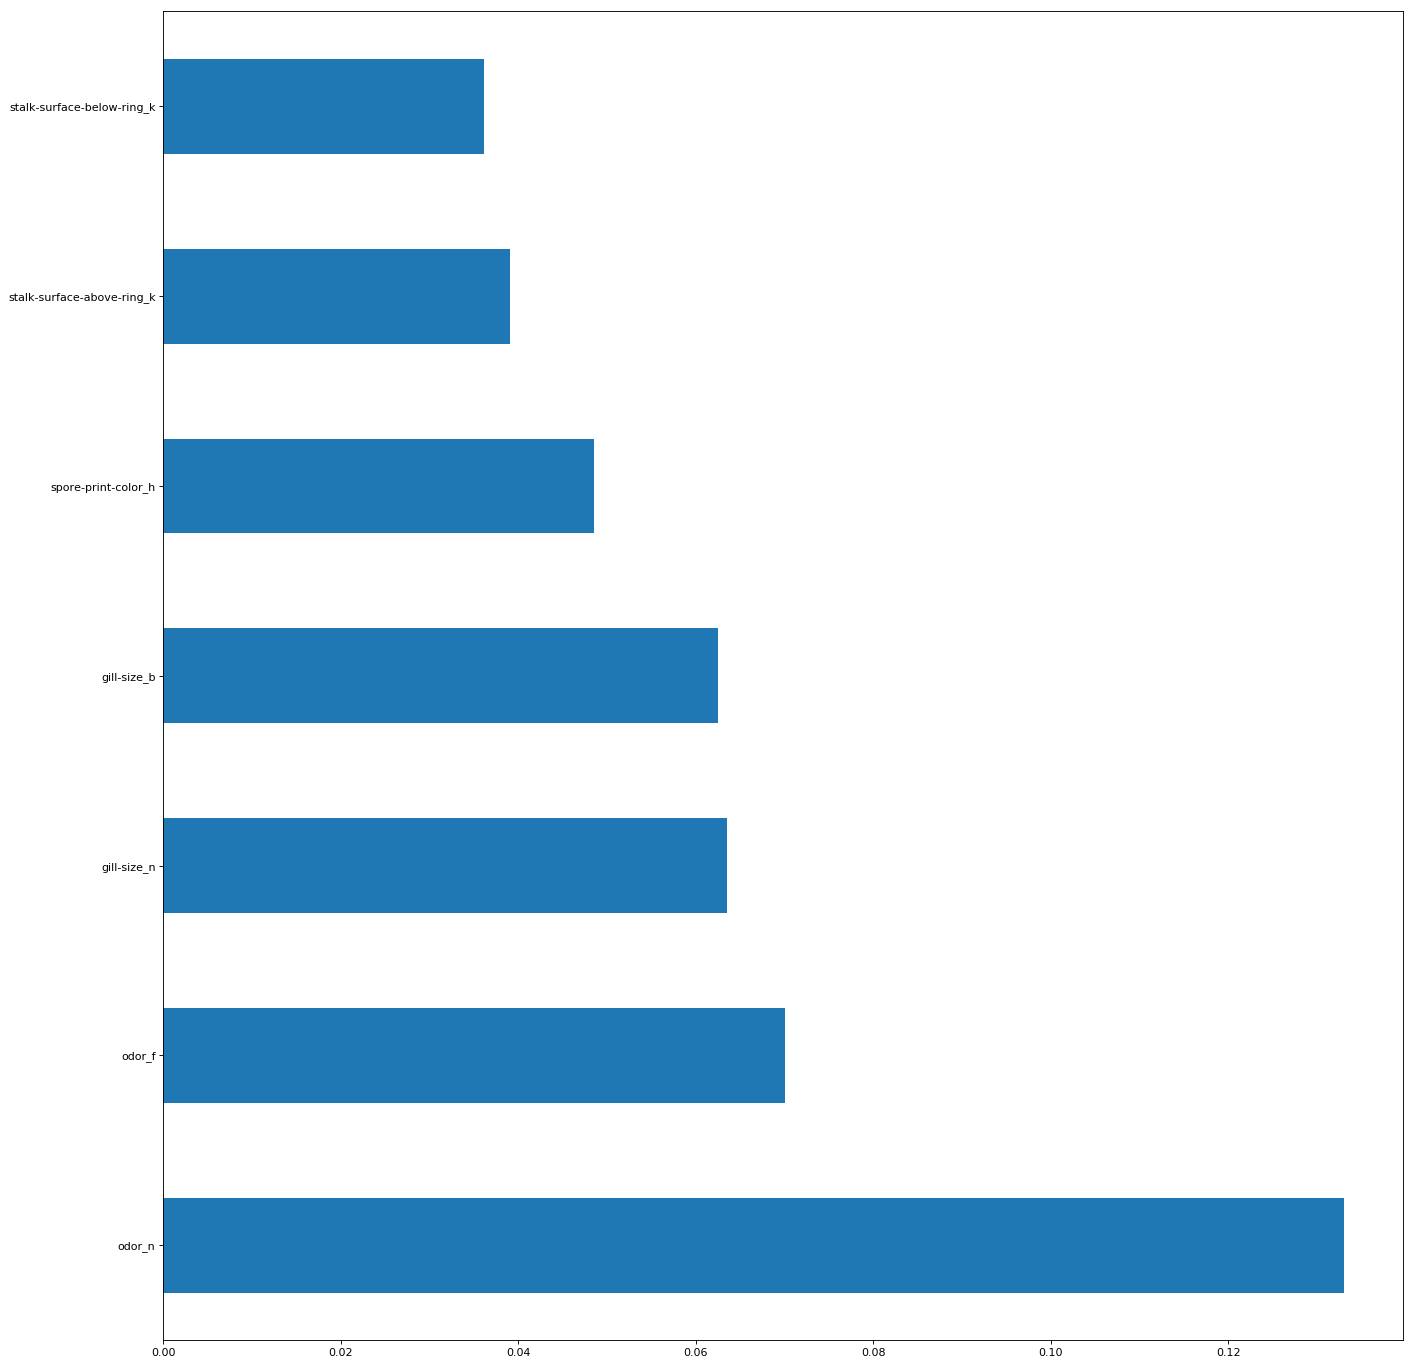

In [5]:
# ~~~~~~~~ Filter Method Contd.~~~~~~~~~
# Feature Importance Ranking

import time
import numpy as np
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix


X = mushrooms.drop(['class'], axis = 1)
X = pd.get_dummies(X, prefix_sep='_')
#print ("X shape: ", X.shape, "X_Train shape: ", X_Train.shape)

trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)

figure(num=None, figsize=(20, 22), dpi=80, facecolor='w', edgecolor='k')
feat_importances = pd.Series(trainedforest.feature_importances_, index = X.columns)
feat_importances.nlargest(7).plot(kind='barh')

In [6]:
# Training random forest using original data
print ("\n~~ Training model using all the provided features ~~\n")

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators=700).fit(X_Train,Y_Train)

print("Processing time(s): ", time.process_time() - start)
predictionforest = trainedforest.predict(X_Test)
print(confusion_matrix(Y_Test,predictionforest))
print(classification_report(Y_Test,predictionforest))

print ("\n~~ Training model using the top 4 features ~~\n")

# Training our model using the top 4

X_Ranked_feat = X[['odor_n', 'odor_f', 'gill-size_n', 'gill-size_b']]
X_Ranked_feat = StandardScaler().fit_transform(X_Ranked_feat)
X_Train2, X_Test2, Y_Train2, Y_Test2 = train_test_split(X_Ranked_feat, Y, test_size = 0.30, 
                                                        random_state = 101)

start = time.process_time()
trainedforest = RandomForestClassifier(n_estimators = 700).fit(X_Train2, Y_Train2)
print("Processing time(s): ", time.process_time() - start)
predictionforest = trainedforest.predict(X_Test2)
print(confusion_matrix(Y_Test2,predictionforest))
print(classification_report(Y_Test2,predictionforest))


~~ Training model using all the provided features ~~

Processing time(s):  1.5315091250000004
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438


~~ Training model using the top 4 features ~~

Processing time(s):  0.9987910479999993
[[1248   26]
 [  53 1111]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1274
           1       0.98      0.95      0.97      1164

    accuracy                           0.97      2438
   macro avg       0.97      0.97      0.97      2438
weighted avg       0.97      0.97      0.97      2438



0.02806401900000033
[[1274    0]
 [   0 1164]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1274
           1       1.00      1.00      1.00      1164

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438



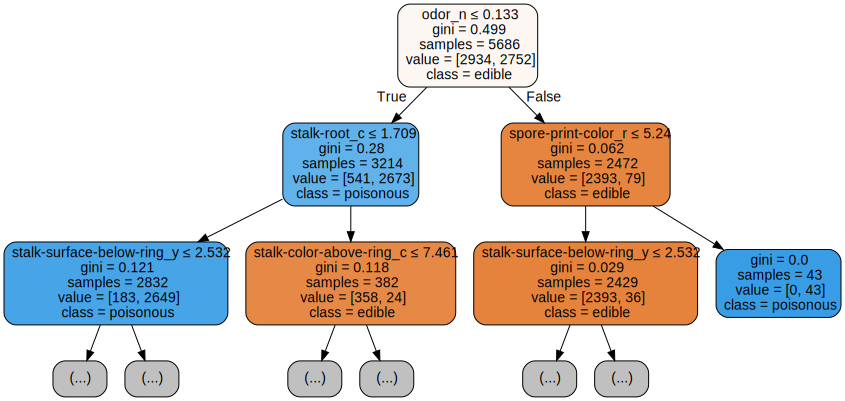

In [8]:
# ~~~~~~~~ Filter Method Contd.~~~~~~~~~
# Feature Importance Ranking 
# Using a trained decision tree

start = time.process_time()
trainedtree = tree.DecisionTreeClassifier().fit(X_Train, Y_Train)
print(time.process_time() - start)
predictionstree = trainedtree.predict(X_Test)
print(confusion_matrix(Y_Test,predictionstree))
print(classification_report(Y_Test,predictionstree))

import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

data = export_graphviz(trainedtree,out_file=None,feature_names= X.columns,
                       class_names=['edible', 'poisonous'],  
                       filled=True, rounded=True,  
                       max_depth=2,
                       special_characters=True)
graph = graphviz.Source(data)
graph

In [10]:
# ~~~~~~~~ Wrapper Method ~~~~~~~~~
# Recursive Feature Elimination (RFE)

from sklearn.feature_selection import RFE
# More info at: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

model = RandomForestClassifier(n_estimators=700)
num_features = 6
rfe = RFE(model, num_features)
# model =  estimator used, num_features = no. of features to select, step = 1(default)
start = time.process_time()
RFE_X_Train = rfe.fit_transform(X_Train,Y_Train)
RFE_X_Test = rfe.transform(X_Test)
rfe = rfe.fit(RFE_X_Train,Y_Train)
print("Processing time(s): ", time.process_time() - start)
print("Overall Accuracy using RFE: ", rfe.score(RFE_X_Test, Y_Test))

/home/gatha/anaconda3/envs/AUN_env/lib/python3.6/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass n_features_to_select=6 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  FutureWarning)


148.86131524299998
Overall Accuracy using RFE:  0.9753896636587367


In [11]:
# ~~~~~~~~ Embedded Method ~~~~~~~~~
# Lasso (L1) Regression

from sklearn.linear_model import LassoCV

regr = LassoCV(cv = 5, random_state = 101)
regr.fit(X_Train,Y_Train)

print("LassoCV Best Alpha Scored: ", regr.alpha_)
print("LassoCV Model Accuracy: ", regr.score(X_Test, Y_Test))

indcs = list(X.columns[:])
model_coef = pd.Series(regr.coef_, index = indcs)
print("Variables Eliminated: ", str(sum(model_coef == 0)))
print("Variables Kept: ", str(sum(model_coef != 0)))


LassoCV Best Alpha Scored:  0.0003964898084478883
LassoCV Model Accuracy:  0.9971840741918596
Variables Eliminated:  73
Variables Kept:  44


/home/gatha/anaconda3/envs/AUN_env/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.37800350585798803, tolerance: 0.14200436158986995
  positive)
